In [5]:
import numpy as np

In [ ]:
def Hyp_param_list(Ind, Max):
    List = ['1', '4', '16', '32', '64']
    string = []
    Possible = List[min(4, 2 * Ind + int(Max/2)) :min(int(Max/2) + 3 + Ind, len(List))]
    if Ind == Max:
        return Possible
    else:
        Next = Hyp_param_list(Ind + 1, Max)
        return ['_'.join([j, i]) for i in Next for j in Possible]

In [42]:
li = Hyp_param_list(0, 3)

In [43]:
import pickle

['4_32_64_64',
 '16_32_64_64',
 '32_32_64_64',
 '4_64_64_64',
 '16_64_64_64',
 '32_64_64_64']

In [3]:
A, B = [2], [3]

In [13]:
A = 'abc'

In [4]:
List = ['1', '2', '4', '8', '16', '32', '64']

In [3]:
import NN
import os
import importlib
import glob
import pandas as pd
import numpy as np
import tensorflow as tf


In [11]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_4
Data variables used : x y temperatureYZ salinityYZ iceDraft
Data variables used : x y temperatureYZ salinityYZ iceDraft
Data variables used : x y temperatureYZ salinityYZ iceDraft
Data variables used : x y temperatureYZ salinityYZ iceDraft
Data variables used : x y temperatureYZ salinityYZ iceDraft
Data variables used : x y temperatureYZ salinityYZ iceDraft
Data variables used : x y temperatureYZ salinityYZ iceDraft
Data variables used : x y temperatureYZ salinityYZ iceDraft
Data variables used : x y temperatureYZ salinityYZ iceDraft
Data variables used : x y temperatureYZ salinityYZ iceDraft
Data variables used : x y temperatureYZ salinityYZ iceDraft


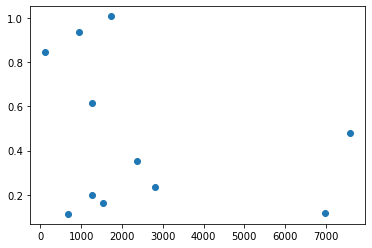

In [26]:
#def Plotting(Epoch = 14, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO', 
             #Plotting_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS' ):
importlib.reload(NN)
Rm, Param, Neur = NN.Plotting(Epoch = 4, Ocean_trained = OcT, Plotting_target = 'Ocean4')

In [6]:
Param

array([   19,    49,    55,   121,   681,   945,  1273,  1729,  1257,
        1521,  2361,  2817,  6977,  7585,  9569, 10689, 14849, 17089])